# Water System Optimization Experiments Using Genetic Algorithms

This notebook demonstrates the optimization of a water system using genetic algorithms. We'll optimize reservoir release parameters and hydroworks distribution parameters to minimize supply deficits while considering operational constraints.

We will change different parameters of the GA (Genetic Algorithm) like population size, number of generations, crossover probability and mutation probability in order to find the best suited GA parameter set for the Zarafshan River Basin Model.

## Setup

First, let's import the required libraries and set up our parameters.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from water_system import  WaterSystem, SupplyNode, StorageNode, DemandNode, SinkNode, HydroWorks, Edge, WaterSystemVisualizer, MultiGeneticOptimizer
import os
import sys

# Add the project directory to the system path
project_dir = 'C:/Users/giann/water_system_simulation_optimization'
if project_dir not in sys.path:
    sys.path.append(project_dir)

# Import the run sample tests function
from ZRB_system import run_ipynb_optimization
# Import the create seasonal ZRB system function
from ZRB_system import create_seasonal_ZRB_system
from ZRB_system import save_optimized_parameters

## ZRB system

The goal is to optimize annual reservoir and hydrowork parameter for the ZRB system. The following code block shows how the GA is called.

In [2]:
start_year = 2017
start_month = 1
num_time_steps = 12*3
ngen = 5
pop_size = 5
cxpb = 0.5
mutpb = 0.2

optimizer = MultiGeneticOptimizer(
        create_seasonal_ZRB_system,
        start_year=start_year,
        start_month=start_month,
        num_time_steps=num_time_steps,
        ngen=ngen,
        population_size=pop_size,
        cxpb=cxpb,
        mutpb=mutpb
    )

results = optimizer.optimize()

print("\nOptimization Results:")
print("-" * 50)
print(f"Message: {results['message']}")
print(f"Population size: {results['population_size']}")
print(f"Generations: {results['generations']}")
print(f"Corss-over probability: {results['crossover_probability']}")
print(f"Mutation probability: {results['mutation_probability']}")
print(f"Final objective value: {results['objective_value']:,.0f} m³")

optimizer.plot_convergence()

gen	nevals	min        	avg        	std        
0  	5     	9.94216e+11	1.59066e+12	5.48744e+11
1  	2     	9.94216e+11	1.06309e+12	8.48228e+10
2  	4     	9.4553e+11 	9.78032e+11	2.04925e+10
3  	5     	9.30129e+11	9.56355e+11	3.06379e+10
4  	4     	9.30129e+11	9.39556e+11	7.32268e+09
5  	4     	9.30129e+11	9.43455e+11	2.47668e+10

Optimization Results:
--------------------------------------------------
Message: Optimization completed successfully
Population size: 5
Generations: 5
Corss-over probability: 0.5
Mutation probability: 0.2
Final objective value: 930,129,023,563 m³


## Analyze Population Size Results

The fil experiment_population_size.csv contains the final objective values determined in a previous experiment/grid search for different populaiton sizes. 

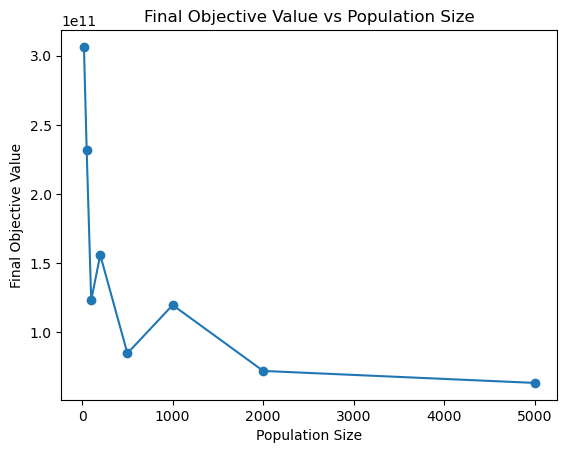

In [3]:
experiment_results = pd.read_csv('./GA_experiments/experiment_population_size.csv')

# plot figure of experiment results plotting Population size versus Final Objective Value.
fig, ax = plt.subplots()
ax.plot(experiment_results['Population Size'], experiment_results['Final Objective Value'], 'o-')
ax.set_xlabel('Population Size')
ax.set_ylabel('Final Objective Value')
ax.set_title('Final Objective Value vs Population Size')
plt.show()

# save figure on disc
fig.savefig('./GA_experiments/experiment_results_pop_size_versus_obj_value.png')

## Optuna

Optuna is a modern hyperparameter optimization framework that automates the process of finding the best parameters for a machine learning model, algorithm, or any other optimization task. It is highly flexible, supports advanced techniques like pruning, and is suitable for a variety of optimization scenarios, including tuning parameters for genetic algorithms (GA).

1. Efficient Sampling:
- Uses techniques like Tree-structured Parzen Estimator (TPE) and other samplers to efficiently explore the search space.
- Focuses on promising areas of the search space instead of blindly testing all combinations.

2. Pruning:
- Dynamically stops unpromising trials (parameter combinations) during execution, saving computation time.

3. Dynamic Search Space:
- Allows the search space to be updated based on intermediate results.

4. Distributed Optimization:
- Scales to multiple machines or processes to perform trials in parallel.

5. Visualization:
- Provides tools to analyze the optimization process, including parameter importance, convergence, and search space exploration.


### Advantages of Optuna
- Automated Tuning: Efficiently finds good parameters without manual intervention.
- Flexibility: Supports dynamic and conditional search spaces.
- Scalability: Easily integrates with parallel and distributed systems.
- Ease of Use: Intuitive API and great visualization tools.


### Let's try...
Keep it small and simple just to see if it works.

In [4]:
import optuna

def objective(trial):
    population = trial.suggest_int('pop_size', 20, 30)
    generations = trial.suggest_int('generations', 5, 6)
    cxpb = trial.suggest_float('cxpb', 0.5, 0.9)
    mutpb = trial.suggest_float('mutpb', 0.1, 0.5)

    optimization_results = run_ipynb_optimization(start_year, start_month, num_time_steps, generations, population, cxpb, mutpb)
    return optimization_results['objective_value']

# Create a study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)

# Print the best parameters and fitness value
print("Best Parameters:", study.best_params)
print("Best Objective Value:", study.best_value)


[I 2025-01-17 09:50:30,197] A new study created in memory with name: no-name-3a9fa855-9dd7-48d5-be74-3c0813a5efb2
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min        	avg        	std        
0  	27    	8.59235e+11	1.40071e+12	4.45003e+11
1  	20    	6.427e+11  	1.06271e+12	2.56629e+11
2  	20    	5.17626e+11	7.70708e+11	1.31956e+11
3  	20    	5.17626e+11	6.72285e+11	1.63502e+11
4  	18    	4.28104e+11	7.24056e+11	4.76651e+11


[I 2025-01-17 09:50:40,947] Trial 0 finished with value: 394412250223.33813 and parameters: {'pop_size': 27, 'generations': 5, 'cxpb': 0.5445520084176264, 'mutpb': 0.3499510142984608}. Best is trial 0 with value: 394412250223.33813.


5  	24    	3.94412e+11	6.97723e+11	5.35773e+11

Optimization Results:
--------------------------------------------------
Message: Optimization completed successfully
Population size: 27
Generations: 5
Corss-over probability: 0.5445520084176264
Mutation probability: 0.3499510142984608
Final objective value: 394,412,250,223 m³
Optimization results saved to ./GA_experiments/optimized_parameters_ZRB_ngen5_pop27_cxpb0.5445520084176264_mutpb0.3499510142984608.json


c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min        	avg       	std        
0  	26    	7.14991e+11	1.5931e+12	5.85007e+11
1  	24    	7.08708e+11	9.90881e+11	2.65607e+11
2  	26    	5.69234e+11	7.55504e+11	1.46487e+11
3  	22    	5.59115e+11	6.56575e+11	6.61575e+10
4  	24    	5.55615e+11	5.91056e+11	4.81684e+10
5  	22    	5.38923e+11	5.63883e+11	9.34739e+09


[I 2025-01-17 09:50:54,545] Trial 1 finished with value: 501876290741.00433 and parameters: {'pop_size': 26, 'generations': 6, 'cxpb': 0.88809370310979, 'mutpb': 0.14169027989137037}. Best is trial 0 with value: 394412250223.33813.


6  	25    	5.01876e+11	5.93319e+11	1.29734e+11

Optimization Results:
--------------------------------------------------
Message: Optimization completed successfully
Population size: 26
Generations: 6
Corss-over probability: 0.88809370310979
Mutation probability: 0.14169027989137037
Final objective value: 501,876,290,741 m³
Optimization results saved to ./GA_experiments/optimized_parameters_ZRB_ngen6_pop26_cxpb0.88809370310979_mutpb0.14169027989137037.json


c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min        	avg        	std        
0  	27    	7.98964e+11	1.60727e+12	3.93187e+11
1  	22    	6.21067e+11	1.13169e+12	2.30308e+11
2  	24    	5.45081e+11	8.01107e+11	1.73199e+11
3  	18    	5.45081e+11	7.33119e+11	2.71922e+11
4  	21    	5.32355e+11	6.19074e+11	1.44316e+11
5  	23    	5.32355e+11	6.30742e+11	2.26938e+11


[I 2025-01-17 09:51:06,950] Trial 2 finished with value: 524924627555.3934 and parameters: {'pop_size': 27, 'generations': 6, 'cxpb': 0.637918573837962, 'mutpb': 0.49884869610668825}. Best is trial 0 with value: 394412250223.33813.


6  	17    	5.24925e+11	6.22971e+11	3.45888e+11

Optimization Results:
--------------------------------------------------
Message: Optimization completed successfully
Population size: 27
Generations: 6
Corss-over probability: 0.637918573837962
Mutation probability: 0.49884869610668825
Final objective value: 524,924,627,555 m³
Optimization results saved to ./GA_experiments/optimized_parameters_ZRB_ngen6_pop27_cxpb0.637918573837962_mutpb0.49884869610668825.json


c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min        	avg        	std        
0  	23    	5.71441e+11	1.46345e+12	5.83604e+11
1  	11    	4.60374e+11	8.515e+11  	3.36141e+11
2  	11    	4.49846e+11	5.63096e+11	4.77549e+10
3  	12    	4.49846e+11	5.98936e+11	3.7858e+11 
4  	12    	4.49846e+11	5.01117e+11	1.82149e+11


[I 2025-01-17 09:51:13,775] Trial 3 finished with value: 441340448259.2107 and parameters: {'pop_size': 23, 'generations': 5, 'cxpb': 0.5485067250547409, 'mutpb': 0.11289531259502522}. Best is trial 0 with value: 394412250223.33813.


5  	13    	4.4134e+11 	4.52448e+11	7.59008e+09

Optimization Results:
--------------------------------------------------
Message: Optimization completed successfully
Population size: 23
Generations: 5
Corss-over probability: 0.5485067250547409
Mutation probability: 0.11289531259502522
Final objective value: 441,340,448,259 m³
Optimization results saved to ./GA_experiments/optimized_parameters_ZRB_ngen5_pop23_cxpb0.5485067250547409_mutpb0.11289531259502522.json


c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min        	avg        	std        
0  	28    	7.19865e+11	1.56984e+12	5.06939e+11
1  	26    	5.96434e+11	9.87627e+11	2.77398e+11
2  	26    	6.35491e+11	7.55289e+11	1.25372e+11
3  	25    	5.26879e+11	7.3571e+11 	2.1861e+11 
4  	22    	5.0972e+11 	7.19215e+11	4.14118e+11
5  	25    	4.92444e+11	5.45538e+11	5.37426e+10


[I 2025-01-17 09:51:27,867] Trial 4 finished with value: 444720750001.4765 and parameters: {'pop_size': 28, 'generations': 6, 'cxpb': 0.7949789043397658, 'mutpb': 0.3398609090108613}. Best is trial 0 with value: 394412250223.33813.


6  	23    	4.44721e+11	6.21447e+11	3.85357e+11

Optimization Results:
--------------------------------------------------
Message: Optimization completed successfully
Population size: 28
Generations: 6
Corss-over probability: 0.7949789043397658
Mutation probability: 0.3398609090108613
Final objective value: 444,720,750,001 m³
Optimization results saved to ./GA_experiments/optimized_parameters_ZRB_ngen6_pop28_cxpb0.7949789043397658_mutpb0.3398609090108613.json
Best Parameters: {'pop_size': 27, 'generations': 5, 'cxpb': 0.5445520084176264, 'mutpb': 0.3499510142984608}
Best Objective Value: 394412250223.33813


#### Visualize Results

In [5]:
import plotly
from optuna.visualization import plot_optimization_history, plot_param_importances, plot_contour, plot_intermediate_values, plot_timeline, plot_slice, plot_edf
# Plot optimization history
plot_optimization_history(study).show()

# Plot parameter importances
plot_param_importances(study).show()

# different plots
plot_edf(study).show()
plot_slice(study).show()
plot_contour(study).show()
plot_intermediate_values(study).show()
plot_timeline(study).show()


[W 2025-01-17 11:43:57,634] Param generations unique value length is less than 2.
[W 2025-01-17 11:43:57,635] Param generations unique value length is less than 2.
[W 2025-01-17 11:43:57,635] Param generations unique value length is less than 2.
[W 2025-01-17 11:43:57,635] Param generations unique value length is less than 2.
[W 2025-01-17 11:43:57,638] Param generations unique value length is less than 2.
[W 2025-01-17 11:43:57,638] Param generations unique value length is less than 2.


[W 2025-01-17 11:43:57,817] You need to set up the pruning feature to utilize `plot_intermediate_values()`


### Let's go a little bit bigger...

In [9]:
def objective(trial):
    population = trial.suggest_int('pop_size', 50, 500)
    generations = trial.suggest_int('generations', 20, 100)
    cxpb = trial.suggest_float('cxpb', 0.5, 0.99)
    mutpb = trial.suggest_float('mutpb', 0.1, 0.8)

    optimization_results = run_ipynb_optimization(start_year, start_month, num_time_steps, generations, population, cxpb, mutpb)
    return optimization_results['objective_value']

# Create a study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5)

# Print the best parameters and fitness value
print("Best Parameters:", study.best_params)
print("Best Objective Value:", study.best_value)

[I 2025-01-17 11:47:32,625] A new study created in memory with name: no-name-92526945-950e-45f4-9c93-3be954f9bd0c
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning:

A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.

c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning:

A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.



gen	nevals	min        	avg        	std        
0  	137   	4.98353e+11	1.54346e+12	5.54831e+11
1  	122   	3.73466e+11	1.03802e+12	4.24886e+11
2  	132   	4.03304e+11	8.68394e+11	4.89584e+11
3  	135   	3.84977e+11	7.93404e+11	4.80321e+11
4  	131   	3.77205e+11	6.35043e+11	3.14305e+11
5  	135   	3.47728e+11	7.05383e+11	4.68817e+11
6  	133   	3.47728e+11	7.07078e+11	5.35138e+11
7  	132   	3.35248e+11	6.77234e+11	4.87035e+11
8  	135   	3.47728e+11	6.93854e+11	5.56332e+11
9  	134   	3.2289e+11 	6.86316e+11	5.93781e+11
10 	136   	3.22116e+11	6.01538e+11	4.74128e+11
11 	135   	3.18538e+11	5.66542e+11	4.28731e+11
12 	134   	3.17017e+11	6.83374e+11	5.81444e+11
13 	133   	3.17017e+11	6.02072e+11	4.85767e+11
14 	135   	3.17017e+11	5.1329e+11 	3.87552e+11
15 	133   	3.17017e+11	5.5649e+11 	4.21265e+11
16 	134   	3.17017e+11	6.38976e+11	5.55351e+11
17 	132   	3.17017e+11	5.87581e+11	4.95807e+11
18 	136   	3.17017e+11	5.20785e+11	4.30068e+11
19 	136   	3.16827e+11	6.68891e+11	5.52487e+11
20 	131   	3.

[I 2025-01-17 12:04:22,797] Trial 0 finished with value: 240128113719.85934 and parameters: {'pop_size': 137, 'generations': 51, 'cxpb': 0.9599629930779292, 'mutpb': 0.4702518952396939}. Best is trial 0 with value: 240128113719.85934.


51 	133   	2.40128e+11	5.93696e+11	5.44637e+11

Optimization Results:
--------------------------------------------------
Message: Optimization completed successfully
Population size: 137
Generations: 51
Corss-over probability: 0.9599629930779292
Mutation probability: 0.4702518952396939
Final objective value: 240,128,113,720 m³
Optimization results saved to ./GA_experiments/optimized_parameters_ZRB_ngen51_pop137_cxpb0.9599629930779292_mutpb0.4702518952396939.json


c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning:

A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.

c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning:

A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.



gen	nevals	min        	avg        	std        
0  	425   	3.73155e+11	1.52407e+12	5.39889e+11
1  	417   	3.73155e+11	1.01245e+12	3.99372e+11
2  	417   	3.73155e+11	8.02144e+11	4.35095e+11
3  	420   	3.68896e+11	6.60796e+11	3.98089e+11
4  	423   	3.10971e+11	6.15491e+11	4.51966e+11
5  	423   	2.95892e+11	5.63229e+11	3.96628e+11
6  	415   	2.95892e+11	5.86123e+11	4.63773e+11
7  	420   	2.91397e+11	5.30433e+11	3.9092e+11 
8  	422   	2.89721e+11	5.4015e+11 	4.10632e+11
9  	424   	2.77448e+11	5.27759e+11	4.18787e+11
10 	425   	2.65931e+11	5.0165e+11 	4.1108e+11 
11 	412   	2.62955e+11	4.74715e+11	3.59712e+11
12 	422   	2.57456e+11	5.59347e+11	4.79866e+11
13 	419   	2.55556e+11	5.06893e+11	4.39779e+11
14 	419   	2.5492e+11 	4.8264e+11 	4.18484e+11
15 	418   	2.36922e+11	5.07938e+11	4.52546e+11
16 	421   	2.47899e+11	4.9036e+11 	4.40362e+11
17 	422   	2.38168e+11	4.6736e+11 	4.18099e+11
18 	422   	2.36821e+11	4.899e+11  	4.66165e+11
19 	419   	2.36821e+11	5.1875e+11 	5.14634e+11
20 	420   	2.

[I 2025-01-17 13:51:53,733] Trial 1 finished with value: 221037972115.9211 and parameters: {'pop_size': 425, 'generations': 55, 'cxpb': 0.9880154791451872, 'mutpb': 0.3547341685715658}. Best is trial 1 with value: 221037972115.9211.


55 	414   	2.21038e+11	5.03202e+11	5.05069e+11

Optimization Results:
--------------------------------------------------
Message: Optimization completed successfully
Population size: 425
Generations: 55
Corss-over probability: 0.9880154791451872
Mutation probability: 0.3547341685715658
Final objective value: 221,037,972,116 m³
Optimization results saved to ./GA_experiments/optimized_parameters_ZRB_ngen55_pop425_cxpb0.9880154791451872_mutpb0.3547341685715658.json


c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning:

A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.

c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning:

A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.



gen	nevals	min        	avg        	std        
0  	451   	3.83613e+11	1.53229e+12	5.27811e+11
1  	382   	3.81771e+11	1.00148e+12	3.73693e+11
2  	385   	3.73458e+11	7.16878e+11	2.8978e+11 
3  	382   	3.50398e+11	5.79202e+11	2.95667e+11
4  	365   	3.08243e+11	5.01556e+11	3.16496e+11
5  	377   	3.08243e+11	4.88187e+11	3.3312e+11 
6  	391   	3.08243e+11	4.63986e+11	3.24472e+11
7  	393   	2.95792e+11	4.71355e+11	3.70189e+11
8  	392   	2.18976e+11	4.4291e+11 	3.21882e+11
9  	385   	2.18976e+11	4.35408e+11	3.62988e+11
10 	393   	2.18976e+11	4.0662e+11 	3.36274e+11
11 	398   	2.18976e+11	4.16406e+11	3.87532e+11
12 	394   	2.18976e+11	3.81041e+11	3.3014e+11 
13 	376   	2.18976e+11	3.40345e+11	2.84345e+11
14 	363   	2.18976e+11	3.35408e+11	3.79874e+11
15 	381   	2.18976e+11	3.54969e+11	3.64162e+11
16 	367   	2.18976e+11	3.20464e+11	3.25025e+11
17 	378   	1.94586e+11	2.97518e+11	2.77551e+11
18 	386   	2.10958e+11	3.4541e+11 	3.66435e+11
19 	389   	2.08497e+11	3.47181e+11	3.55723e+11
20 	396   	2.

[I 2025-01-17 14:37:50,083] Trial 2 finished with value: 158523407688.37564 and parameters: {'pop_size': 451, 'generations': 56, 'cxpb': 0.8204034986005839, 'mutpb': 0.16513645373298075}. Best is trial 2 with value: 158523407688.37564.
c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning:

A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.

c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning:

A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.



56 	387   	1.58523e+11	3.20264e+11	3.93405e+11

Optimization Results:
--------------------------------------------------
Message: Optimization completed successfully
Population size: 451
Generations: 56
Corss-over probability: 0.8204034986005839
Mutation probability: 0.16513645373298075
Final objective value: 158,523,407,688 m³
Optimization results saved to ./GA_experiments/optimized_parameters_ZRB_ngen56_pop451_cxpb0.8204034986005839_mutpb0.16513645373298075.json
gen	nevals	min        	avg        	std        
0  	475   	4.15933e+11	1.51972e+12	5.44576e+11
1  	376   	4.15933e+11	9.88511e+11	3.63579e+11
2  	380   	3.67386e+11	7.35353e+11	3.53447e+11
3  	381   	3.57905e+11	6.64858e+11	4.28283e+11
4  	377   	3.28659e+11	5.87808e+11	4.00908e+11
5  	384   	3.16728e+11	5.39758e+11	3.78248e+11
6  	374   	3.00377e+11	5.47523e+11	4.04865e+11
7  	358   	2.98068e+11	4.81151e+11	3.30975e+11
8  	362   	2.97742e+11	4.90045e+11	3.613e+11  
9  	360   	2.95173e+11	4.78175e+11	3.84811e+11
10 	376   	2.7

[I 2025-01-17 15:13:35,827] Trial 3 finished with value: 167756904008.99597 and parameters: {'pop_size': 475, 'generations': 49, 'cxpb': 0.7120547226671534, 'mutpb': 0.2517107107329721}. Best is trial 2 with value: 158523407688.37564.


49 	385   	1.67757e+11	4.02397e+11	4.89189e+11

Optimization Results:
--------------------------------------------------
Message: Optimization completed successfully
Population size: 475
Generations: 49
Corss-over probability: 0.7120547226671534
Mutation probability: 0.2517107107329721
Final objective value: 167,756,904,009 m³
Optimization results saved to ./GA_experiments/optimized_parameters_ZRB_ngen49_pop475_cxpb0.7120547226671534_mutpb0.2517107107329721.json


c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning:

A class named 'FitnessMulti' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.

c:\Users\giann\Anaconda\envs\envMT\Lib\site-packages\deap\creator.py:185: RuntimeWarning:

A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.



gen	nevals	min        	avg        	std        
0  	114   	4.08857e+11	1.42956e+12	5.29717e+11
1  	95    	4.08857e+11	9.62353e+11	3.33791e+11
2  	99    	3.90612e+11	8.88687e+11	4.91131e+11
3  	99    	3.90612e+11	7.53152e+11	4.28334e+11
4  	92    	3.65701e+11	6.98339e+11	4.27783e+11
5  	92    	3.65701e+11	6.63747e+11	4.63598e+11
6  	98    	3.76674e+11	6.65802e+11	4.33165e+11
7  	94    	3.62588e+11	6.22212e+11	4.28145e+11
8  	91    	3.46409e+11	5.86884e+11	3.66162e+11
9  	97    	3.55971e+11	6.32332e+11	4.93111e+11
10 	89    	3.55971e+11	6.71628e+11	4.55255e+11
11 	98    	3.05227e+11	6.93307e+11	4.55776e+11
12 	94    	3.05227e+11	5.78792e+11	4.03445e+11
13 	96    	2.88569e+11	5.81295e+11	4.38289e+11
14 	94    	2.87138e+11	5.70704e+11	4.3455e+11 
15 	89    	2.78734e+11	5.99271e+11	5.49868e+11
16 	89    	2.60155e+11	5.5144e+11 	4.6274e+11 
17 	101   	2.60155e+11	5.46375e+11	4.62537e+11
18 	100   	2.46133e+11	5.89271e+11	4.93976e+11
19 	103   	2.46133e+11	5.72668e+11	4.60925e+11
20 	95    	2.

[I 2025-01-17 15:19:33,593] Trial 4 finished with value: 222397010336.02673 and parameters: {'pop_size': 114, 'generations': 30, 'cxpb': 0.7084377768303122, 'mutpb': 0.4610073063185568}. Best is trial 2 with value: 158523407688.37564.


30 	97    	2.22397e+11	5.71992e+11	5.17755e+11

Optimization Results:
--------------------------------------------------
Message: Optimization completed successfully
Population size: 114
Generations: 30
Corss-over probability: 0.7084377768303122
Mutation probability: 0.4610073063185568
Final objective value: 222,397,010,336 m³
Optimization results saved to ./GA_experiments/optimized_parameters_ZRB_ngen30_pop114_cxpb0.7084377768303122_mutpb0.4610073063185568.json
Best Parameters: {'pop_size': 451, 'generations': 56, 'cxpb': 0.8204034986005839, 'mutpb': 0.16513645373298075}
Best Objective Value: 158523407688.37564


In [10]:
import plotly
from optuna.visualization import plot_optimization_history, plot_param_importances, plot_contour, plot_intermediate_values, plot_timeline, plot_slice, plot_edf
# Plot optimization history
plot_optimization_history(study).show()

# Plot parameter importances
plot_param_importances(study).show()

# different plots
plot_edf(study).show()
plot_slice(study).show()
plot_contour(study).show()
plot_intermediate_values(study).show()
plot_timeline(study).show()

[W 2025-01-17 15:44:25,746] You need to set up the pruning feature to utilize `plot_intermediate_values()`
